# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.142  1  0.260 0.611 0.001   
                             age        0.043  1  0.079 0.780 0.000   
                             Kiel       1.681  1  3.081 0.081 0.016   
                             Magdeburg  5.002  1  9.167 0.003 0.046   
                             Sweden     7.894  1 14.469 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.470  1  0.473 0.492 0.002   
                             age        1.447  1  1.455 0.229 0.008   
                             Kiel       0.057  1  0.057 0.811 0.000   
                             Magdeburg  2.836  1  2.852 0.093 0.015   
                             Sweden    14.184  1 14.266 0.000 0.069   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.214  0.742    False  
                             age               0.108  0.865    False  
                             Kiel              1.093  0.176    False  
                             Magdeburg         2.552  0.012     True  
                             Sweden            3.717  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.308  0.644    False  
                             age               0.640  0.383    False  
                             Kiel              0.091  0.886    False  
                             Magdeburg         1.032  0.196    False  
                             Sweden            3.674  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.988  1  7.223 0.008 0.036   
                             age        0.012  1  0.087 0.768 0.000   
                             Kiel       0.285  1  2.085 0.150 0.011   
                             Magdeburg  0.465  1  3.399 0.067 0.017   
                             Sweden     1.669  1 12.197 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.515  1  4.954 0.027 0.025   
                             age        0.497  1  0.979 0.324 0.005   
                             Kiel       2.701  1  5.320 0.022 0.027   
                             Magdeburg  2.633  1  5.186 0.024 0.026   
                             Sweden    17.377  1 34.226 0.000 0.152   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.106  0.022     True  
                             age               0.115  0.840    False  
                             Kiel              0.823  0.250    False  
                             Magdeburg         1.175  0.131    False  
                             Sweden            3.226  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.566  0.062    False  
                             age               0.490  0.455    False  
                             Kiel              1.654  0.052    False  
                             Magdeburg         1.622  0.056    False  
                             Sweden            7.678  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.611         0.214  0.742    False   
                             age       0.780         0.108  0.865    False   
                             Kiel      0.081         1.093  0.176    False   
                             Magdeburg 0.003         2.552  0.012     True   
                             Sweden    0.000         3.717  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.492         0.308  0.644    False   
                             age       0.229         0.640  0.383    False   
                             Kiel      0.811         0.091  0.886    False   
                             Magdeburg 0.093         1.032  0.196    False   
                             Sweden    0.000         3.674  0.001     True   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.008         2.106  0.022     True  
                             age       0.768         0.115  0.840    False  
                             Kiel      0.150         0.823  0.250    False  
                             Magdeburg 0.067         1.175  0.131    False  
                             Sweden    0.001         3.226  0.002     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.027         1.566  0.062    False  
                             age       0.324         0.490  0.455    False  
                             Kiel      0.022         1.654  0.052    False  
                             Magdeburg 0.024         1.622  0.056    False  
                             Sweden    0.000         7.678  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.488     0.336     0.223         3.322     0.276
std       0.302         5.327     0.330     0.293         6.204     0.319
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.337     0.015     0.000         0.412     0.002
50%       0.119         0.925     0.238     0.059         1.228     0.118
75%       0.460         2.430     0.614     0.387         3.334     0.516
max       1.000       148.908     1.000     1.000        85.491     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.611         0.214   
A0A024R0T9;K7ER74;P02655                           AD     0.062         1.208   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.070         1.155   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.717         0.144   
A0A075B6H7                                         AD     0.058         1.239   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.005         2.282   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.255         0.594   
S4R3U6                                             AD     0.492         0.308   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.742    False   
A0A024R0T9;K7ER74;P02655                           AD      0.144    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.157    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.819    False   
A0A075B6H7                                         AD      0.135    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.020     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.413    False   
S4R3U6                                             AD      0.644    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.008         2.106   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.507   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.345         0.462   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.259         0.586   
A0A075B6H7                                         AD     0.004         2.386   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.199         0.700   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.697         0.156   
S4R3U6                                             AD     0.027         1.566   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.022     True  
A0A024R0T9;K7ER74;P02655                           AD      0.069    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.476    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.385    False  
A0A075B6H7                                         AD      0.012     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.411     0.337     0.239         1.589     0.299
std       0.292         1.641     0.318     0.290         1.829     0.314
min       0.000         0.002     0.000     0.000         0.001     0.000
25%       0.011         0.350     0.036     0.006         0.373     0.018
50%       0.123         0.910     0.244     0.092         1.038     0.169
75%       0.447         1.954     0.603     0.423         2.192     0.551
max       0.996        21.501     0.998     0.997        20.306     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1020,934


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.611         0.214  0.742   
A0A024R0T9;K7ER74;P02655                           0.062         1.208  0.144   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.070         1.155  0.157   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.717         0.144  0.819   
A0A075B6H7                                         0.058         1.239  0.135   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.005         2.282  0.020   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.255         0.594  0.413   
S4R3U6                                             0.492         0.308  0.644   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.008   
A0A024R0T9;K7ER74;P02655                              False 0.031   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.345   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.259   
A0A075B6H7                                            False 0.004   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.199   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.697   
S4R3U6                                                False 0.027   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.106  0.022   
A0A024R0T9;K7ER74;P02655                                   1.507  0.069   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.462  0.476   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.586  0.385   
A0A075B6H7                                                 2.386  0.012   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.282   
Q9Y6X5                                                     0.700  0.312   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.156   
Q9Y6Y9                                                     0.156  0.788   
S4R3U6                                                     1.566  0.062   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    874
PI (yes) - VAE (yes)   341
PI (no)  - VAE (yes)   146
PI (yes) - VAE (no)     60
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                 VAE  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.611         0.214  0.742    False 0.008   
A0A075B6H7                   0.058         1.239  0.135    False 0.004   
A0A075B6I0                   0.031         1.512  0.082    False 0.001   
A0A075B6J9                   0.030         1.528  0.080    False 0.009   
A0A075B6Q5                   0.292         0.534  0.454    False 0.005   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.012         1.914  0.039     True 0.900   
Q9UP79                       0.481         0.317  0.633    False 0.000   
Q9UQ52                       0.035         1.460  0.091    False 0.001   
Q9Y6C2                       0.846         0.073  0.909    False 0.008   
Q9Y6X5                       0.005         2.282  0.020     True 0.199   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.106  0.022     True       186  
A0A075B6H7                           2.386  0.012     True        91  
A0A075B6I0                           3.151  0.003     True       194  
A0A075B6J9                           2.069  0.023     True       156  
A0A075B6Q5                           2.266  0.016     True       104  
...                                    ...    ...      ...       ...  
Q9UNW1                               0.046  0.935    False       171  
Q9UP79                               4.705  0.000     True       135  
Q9UQ52                               3.258  0.002     True       188  
Q9Y6C2                               2.106  0.022     True       119  
Q9Y6X5                               0.700  0.312    False       173  

[206 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.742,0.022,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.144,0.069,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.157,0.476,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.819,0.385,196,PI (no) - VAE (no)
A0A075B6H7,0.135,0.012,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.316,0.282,197,PI (no) - VAE (no)
Q9Y6X5,0.020,0.312,173,PI (yes) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.156,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
F5GWE5;I3L2X8;I3L3W1;I3L459;I3L471;I3L4C0;I3L4H1;I3L4U7;Q00169,0.975,0.002,78,PI (no) - VAE (yes),0.973
P52758,0.002,0.970,119,PI (yes) - VAE (no),0.968
D6RF35,0.975,0.022,57,PI (no) - VAE (yes),0.953
A0A087X1Z2;C9JTV4;H0Y4Y4;Q8WYH2;Q96C19;Q9BUP0;Q9BUP0-2,0.000,0.943,66,PI (yes) - VAE (no),0.943
A6NCT7;Q07092;Q07092-2,0.935,0.002,147,PI (no) - VAE (yes),0.933
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.046,197,PI (no) - VAE (yes),0.011
Q9NX62,0.055,0.045,197,PI (no) - VAE (yes),0.010
P00740;P00740-2,0.052,0.042,197,PI (no) - VAE (yes),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


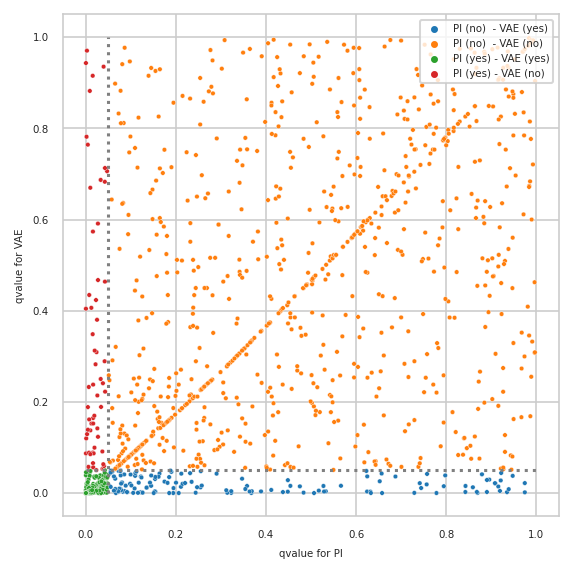

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


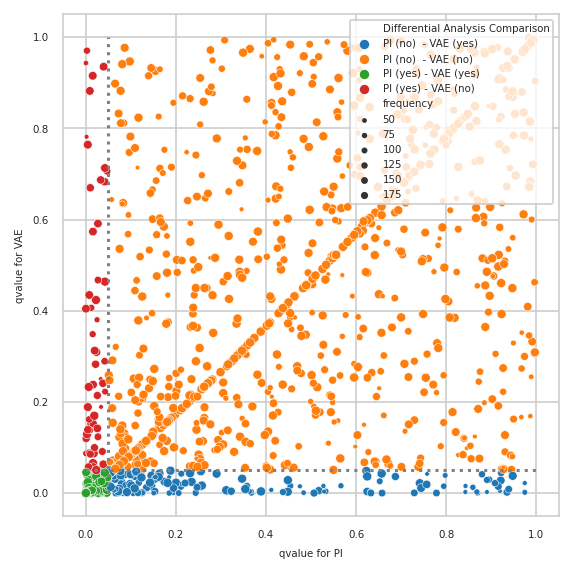

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out